In [66]:
import sweetviz
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Reading

In [68]:
Data = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ZeroFilledSubCategory_Sellout.csv"))
#Data = Data.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Sales" : "Shipment"})
Data.columns

Index(['SKU', 'Date', 'Sales', 'Time', 'Sellout'], dtype='object')

In [69]:
Data1 = Data[['SKU','Time','Date','Sales']]
Data1

SKU    Time        Date      Sales
0                   5 HTP  W40-19  2019-10-07     94.000
1          A & D VITAMINS  W40-19  2019-10-07     29.000
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000
3                    ACAI  W40-19  2019-10-07    264.000
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000
...                   ...     ...         ...        ...
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428
14783             YOHIMBE  W14-21  2021-04-05    328.336
14784                ZINC  W14-21  2021-04-05  25267.590

[14785 rows x 4 columns]

## Glance View

In [70]:
# GlanceView = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","GlanceView.csv"))
# GlanceView = GlanceView.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Glance View PW" : "GlanceView"})
# GlanceView
GlanceView = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","SubCategoryGlanceView.csv"))
GlanceView = GlanceView.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU","Glance View PW" : "GlanceView"})
GlanceView

Version.[Version Name]    Time           SKU  GlanceView
0         CurrentWorkingView  W01-20   ASTAXANTHIN           0
1         CurrentWorkingView  W02-20   ASTAXANTHIN           0
2         CurrentWorkingView  W03-20   ASTAXANTHIN           0
3         CurrentWorkingView  W04-20   ASTAXANTHIN           0
4         CurrentWorkingView  W05-20   ASTAXANTHIN           0
...                      ...     ...           ...         ...
10463     CurrentWorkingView  W01-21  BLENDED OILS          74
10464     CurrentWorkingView  W02-21  BLENDED OILS          98
10465     CurrentWorkingView  W03-21  BLENDED OILS          88
10466     CurrentWorkingView  W04-21  BLENDED OILS          64
10467     CurrentWorkingView  W05-21  BLENDED OILS          70

[10468 rows x 4 columns]

## Lag Function

In [71]:
def create_lag_variables(df, date_column, grouped_on, shifting_var
                         , month_ascending=True, lag_vars_range = list()):
    """
    Function to create lag-variables    
    Parameters
    ----------
    df : pandas dataframe
        DESCRIPTION. Containing column names like month, banner_id, sku_id and actual_quantity.
    lag_vars_range : list, not optional
        DESCRIPTION. Pass a set of integers which will then generate the individual
        lag variables.

    Returns
    -------
    df : updated pandas dataframe with lag variables
        The passed dataframe is updated with the set of lag-variables 
        as passed to lag_vars_range

    """
    for lag in lag_vars_range:
        df[shifting_var+'lag_'+str(lag)] = (df
                               .sort_values(by = date_column, ascending = month_ascending)
                               .groupby(grouped_on)[shifting_var].shift(lag)
                               .fillna(0))
    return df

In [72]:
#GlanceView['SKU'] = GlanceView['SKU'].astype(str)
Data1 = pd.merge(Data1, GlanceView[['SKU','Time','GlanceView']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date      Sales  GlanceView
0                   5 HTP  W40-19  2019-10-07     94.000         NaN
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN
3                    ACAI  W40-19  2019-10-07    264.000         NaN
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN
...                   ...     ...         ...        ...         ...
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN
14784                ZINC  W14-21  2021-04-05  25267.590         NaN

[14785 rows x 5 columns]

In [73]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="GlanceView",month_ascending=True,lag_vars_range=[1,2,3,4])

In [74]:
#Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="GlanceView",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "GlanceView_Lag1","lag_2" : "GlanceView_Lag2", "lag_3" :"GlanceView_Lag3","lag_4" :"GlanceView_Lag4"})
Data1.describe()

Sales     GlanceView  GlanceViewlag_1  GlanceViewlag_2  \
count  14785.000000   10234.000000     14785.000000     14785.000000   
mean    2055.668838    7371.949384      5102.775110      5102.775110   
std     5316.307869   20774.150505     17615.199066     17615.199066   
min      -40.000000       0.000000         0.000000         0.000000   
25%       43.000000     191.250000         0.000000         0.000000   
50%      291.025000    1016.000000       264.000000       264.000000   
75%     1389.000000    4850.500000      2326.000000      2326.000000   
max    83705.643000  304436.000000    304436.000000    304436.000000   

       GlanceViewlag_3  GlanceViewlag_4  
count     14785.000000     14785.000000  
mean       5102.775110      5102.775110  
std       17615.199066     17615.199066  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%         264.000000       264.000000  
75%        2326.000000      2326.000000  
max      304436.000000    304436.000000

In [75]:
pearson = Data1.corr(method='pearson')
pearson

Sales  GlanceView  GlanceViewlag_1  GlanceViewlag_2  \
Sales            1.000000    0.904814         0.771577         0.772546   
GlanceView       0.904814    1.000000         0.938402         0.913389   
GlanceViewlag_1  0.771577    0.938402         1.000000         0.922028   
GlanceViewlag_2  0.772546    0.913389         0.922028         1.000000   
GlanceViewlag_3  0.776770    0.900645         0.875331         0.922028   
GlanceViewlag_4  0.781302    0.886601         0.841945         0.875331   

                 GlanceViewlag_3  GlanceViewlag_4  
Sales                   0.776770         0.781302  
GlanceView              0.900645         0.886601  
GlanceViewlag_1         0.875331         0.841945  
GlanceViewlag_2         0.922028         0.875331  
GlanceViewlag_3         1.000000         0.922028  
GlanceViewlag_4         0.922028         1.000000

<AxesSubplot:>

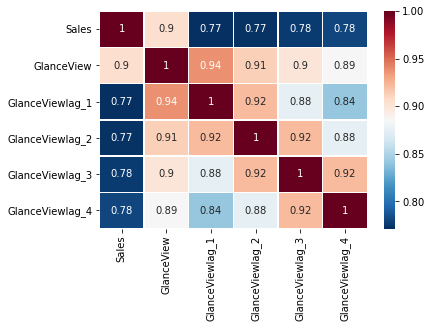

In [76]:
import seaborn as sb
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Out of Stock

In [77]:
# OOS = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","OutOfStockData.csv"))
# OOS = OOS.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Rep OOS PW" : "OOS","Rep OOS% PW" : "OOS%"})
# OOS.columns
OOS = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","OOS_SubCategory.csv"))
OOS = OOS.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU","Rep OOS PW" : "OOS","Rep OOS% PW" : "OOS%"})
OOS.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'OOS%', 'OOS'], dtype='object')

In [78]:
#Data1['SKU'] = Data1['SKU'].astype(int)

Data1 = pd.merge(Data1, OOS[['SKU','Time','OOS','OOS%']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date      Sales  GlanceView  \
0                   5 HTP  W40-19  2019-10-07     94.000         NaN   
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN   
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN   
3                    ACAI  W40-19  2019-10-07    264.000         NaN   
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN   
...                   ...     ...         ...        ...         ...   
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN   
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN   
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN   
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN   
14784                ZINC  W14-21  2021-04-05  25267.590         NaN   

       GlanceViewlag_1  GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
14780              0.0              0.0              0.0              0.0   
14781              0.0              0.0              0.0              0.0   
14782              0.0              0.0              0.0              0.0   
14783              0.0              0.0              0.0              0.0   
14784              0.0              0.0              0.0              0.0   

       OOS  OOS%  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN  
...    ...   ...  
14780  NaN   NaN  
14781  NaN   NaN  
14782  NaN   NaN  
14783  NaN   NaN  
14784  NaN   NaN  

[14785 rows x 11 columns]

In [79]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS",month_ascending=True,lag_vars_range=[1,2,3,4])

In [80]:
Data1 = Data1.rename(columns={"lag_1": "OOS_Lag1","lag_2" : "OOS_Lag2", "lag_3" :"OOS_Lag3","lag_4" :"OOS_Lag4"})
Data1

SKU    Time        Date      Sales  GlanceView  \
0                   5 HTP  W40-19  2019-10-07     94.000         NaN   
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN   
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN   
3                    ACAI  W40-19  2019-10-07    264.000         NaN   
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN   
...                   ...     ...         ...        ...         ...   
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN   
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN   
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN   
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN   
14784                ZINC  W14-21  2021-04-05  25267.590         NaN   

       GlanceViewlag_1  GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
14780              0.0              0.0              0.0              0.0   
14781              0.0              0.0              0.0              0.0   
14782              0.0              0.0              0.0              0.0   
14783              0.0              0.0              0.0              0.0   
14784              0.0              0.0              0.0              0.0   

       OOS  OOS%  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  
0      NaN   NaN       0.0       0.0       0.0       0.0  
1      NaN   NaN       0.0       0.0       0.0       0.0  
2      NaN   NaN       0.0       0.0       0.0       0.0  
3      NaN   NaN       0.0       0.0       0.0       0.0  
4      NaN   NaN       0.0       0.0       0.0       0.0  
...    ...   ...       ...       ...       ...       ...  
14780  NaN   NaN       0.0       0.0       0.0       0.0  
14781  NaN   NaN       0.0       0.0       0.0       0.0  
14782  NaN   NaN       0.0       0.0       0.0       0.0  
14783  NaN   NaN       0.0       0.0       0.0       0.0  
14784  NaN   NaN       0.0       0.0       0.0       0.0  

[14785 rows x 15 columns]

In [81]:
pearson = Data1.corr(method='pearson')
pearson

Sales  GlanceView  GlanceViewlag_1  GlanceViewlag_2  \
Sales            1.000000    0.904814         0.771577         0.772546   
GlanceView       0.904814    1.000000         0.938402         0.913389   
GlanceViewlag_1  0.771577    0.938402         1.000000         0.922028   
GlanceViewlag_2  0.772546    0.913389         0.922028         1.000000   
GlanceViewlag_3  0.776770    0.900645         0.875331         0.922028   
GlanceViewlag_4  0.781302    0.886601         0.841945         0.875331   
OOS              0.555144    0.514523         0.529491         0.546146   
OOS%             0.032616    0.009868         0.020306         0.028295   
OOSlag_1         0.482191    0.507521         0.527974         0.531437   
OOSlag_2         0.487409    0.505148         0.514927         0.527974   
OOSlag_3         0.484778    0.494678         0.509184         0.514927   
OOSlag_4         0.492767    0.514123         0.493658         0.509184   

                 GlanceViewlag_3  GlanceViewlag_4       OOS      OOS%  \
Sales                   0.776770         0.781302  0.555144  0.032616   
GlanceView              0.900645         0.886601  0.514523  0.009868   
GlanceViewlag_1         0.875331         0.841945  0.529491  0.020306   
GlanceViewlag_2         0.922028         0.875331  0.546146  0.028295   
GlanceViewlag_3         1.000000         0.922028  0.531626  0.032696   
GlanceViewlag_4         0.922028         1.000000  0.531382  0.034770   
OOS                     0.531626         0.531382  1.000000  0.104298   
OOS%                    0.032696         0.034770  0.104298  1.000000   
OOSlag_1                0.533047         0.506491  0.682635  0.097685   
OOSlag_2                0.531437         0.533047  0.425358  0.076863   
OOSlag_3                0.527974         0.531437  0.401700  0.066233   
OOSlag_4                0.514927         0.527974  0.399549  0.063935   

                 OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  
Sales            0.482191  0.487409  0.484778  0.492767  
GlanceView       0.507521  0.505148  0.494678  0.514123  
GlanceViewlag_1  0.527974  0.514927  0.509184  0.493658  
GlanceViewlag_2  0.531437  0.527974  0.514927  0.509184  
GlanceViewlag_3  0.533047  0.531437  0.527974  0.514927  
GlanceViewlag_4  0.506491  0.533047  0.531437  0.527974  
OOS              0.682635  0.425358  0.401700  0.399549  
OOS%             0.097685  0.076863  0.066233  0.063935  
OOSlag_1         1.000000  0.685016  0.431508  0.404337  
OOSlag_2         0.685016  1.000000  0.685016  0.431508  
OOSlag_3         0.431508  0.685016  1.000000  0.685016  
OOSlag_4         0.404337  0.431508  0.685016  1.000000

<AxesSubplot:>

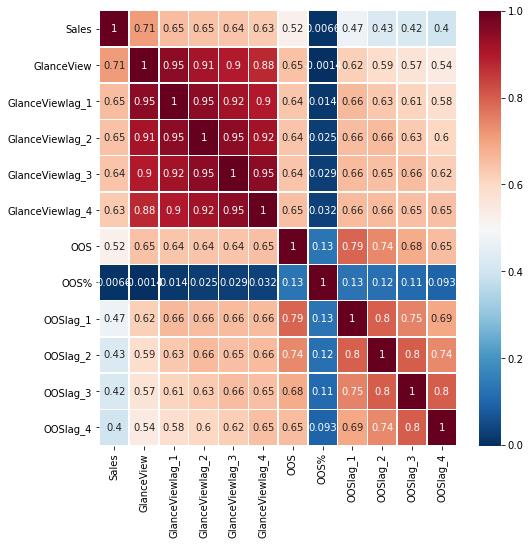

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [82]:
# Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS%",month_ascending=True,lag_vars_range=[1,2,3,4])
# Data1.columns

In [83]:
# Data1 = Data1.rename(columns={"lag_1": "OOS%_Lag1","lag_2" : "OOS%_Lag2", "lag_3" :"OOS%_Lag3","lag_4" :"OOS%_Lag4"})
# Data1.columns

# LBB Price

In [84]:
# LBB = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","LBB_Price_Data.csv"))
# LBB = LBB.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","LBB Price" : "LBB_Price"})
# LBB.columns
LBB = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","LBB_SubCategory.csv"))
LBB = LBB.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU","LBB Price" : "LBB_Price"})
LBB.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'LBB_Price'], dtype='object')

In [85]:
Data1 = pd.merge(Data1, LBB[['SKU','Time','LBB_Price']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date      Sales  GlanceView  \
0                   5 HTP  W40-19  2019-10-07     94.000         NaN   
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN   
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN   
3                    ACAI  W40-19  2019-10-07    264.000         NaN   
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN   
...                   ...     ...         ...        ...         ...   
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN   
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN   
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN   
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN   
14784                ZINC  W14-21  2021-04-05  25267.590         NaN   

       GlanceViewlag_1  GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
14780              0.0              0.0              0.0              0.0   
14781              0.0              0.0              0.0              0.0   
14782              0.0              0.0              0.0              0.0   
14783              0.0              0.0              0.0              0.0   
14784              0.0              0.0              0.0              0.0   

       OOS  OOS%  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  
0      NaN   NaN       0.0       0.0       0.0       0.0   0.224359  
1      NaN   NaN       0.0       0.0       0.0       0.0   0.017544  
2      NaN   NaN       0.0       0.0       0.0       0.0   0.038841  
3      NaN   NaN       0.0       0.0       0.0       0.0   0.021055  
4      NaN   NaN       0.0       0.0       0.0       0.0   0.110714  
...    ...   ...       ...       ...       ...       ...        ...  
14780  NaN   NaN       0.0       0.0       0.0       0.0        NaN  
14781  NaN   NaN       0.0       0.0       0.0       0.0        NaN  
14782  NaN   NaN       0.0       0.0       0.0       0.0        NaN  
14783  NaN   NaN       0.0       0.0       0.0       0.0        NaN  
14784  NaN   NaN       0.0       0.0       0.0       0.0        NaN  

[14785 rows x 16 columns]

In [86]:
# import seaborn as sb
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12,12))
# sb.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,linewidths=0.5, ax=ax)

In [87]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="LBB_Price",month_ascending=True,lag_vars_range=[1,2,3,4])


In [88]:
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4'],
      dtype='object')

In [89]:
Data1 = Data1.rename(columns={"lag_1": "LBBP_Lag1","lag_2" : "LBBP_Lag2", "lag_3" :"LBBP_Lag3","lag_4" :"LBBP_Lag4"})


In [90]:
pearson = Data1.corr(method='pearson')
pearson

Sales  GlanceView  GlanceViewlag_1  GlanceViewlag_2  \
Sales            1.000000    0.904814         0.771577         0.772546   
GlanceView       0.904814    1.000000         0.938402         0.913389   
GlanceViewlag_1  0.771577    0.938402         1.000000         0.922028   
GlanceViewlag_2  0.772546    0.913389         0.922028         1.000000   
GlanceViewlag_3  0.776770    0.900645         0.875331         0.922028   
GlanceViewlag_4  0.781302    0.886601         0.841945         0.875331   
OOS              0.555144    0.514523         0.529491         0.546146   
OOS%             0.032616    0.009868         0.020306         0.028295   
OOSlag_1         0.482191    0.507521         0.527974         0.531437   
OOSlag_2         0.487409    0.505148         0.514927         0.527974   
OOSlag_3         0.484778    0.494678         0.509184         0.514927   
OOSlag_4         0.492767    0.514123         0.493658         0.509184   
LBB_Price       -0.025985   -0.019262        -0.036966        -0.036134   
LBB_Pricelag_1  -0.025044   -0.017455        -0.019905        -0.022189   
LBB_Pricelag_2  -0.022057   -0.016003        -0.016212        -0.019905   
LBB_Pricelag_3  -0.018607   -0.015203        -0.012579        -0.016212   
LBB_Pricelag_4  -0.015676   -0.013447        -0.008848        -0.012579   

                 GlanceViewlag_3  GlanceViewlag_4       OOS      OOS%  \
Sales                   0.776770         0.781302  0.555144  0.032616   
GlanceView              0.900645         0.886601  0.514523  0.009868   
GlanceViewlag_1         0.875331         0.841945  0.529491  0.020306   
GlanceViewlag_2         0.922028         0.875331  0.546146  0.028295   
GlanceViewlag_3         1.000000         0.922028  0.531626  0.032696   
GlanceViewlag_4         0.922028         1.000000  0.531382  0.034770   
OOS                     0.531626         0.531382  1.000000  0.104298   
OOS%                    0.032696         0.034770  0.104298  1.000000   
OOSlag_1                0.533047         0.506491  0.682635  0.097685   
OOSlag_2                0.531437         0.533047  0.425358  0.076863   
OOSlag_3                0.527974         0.531437  0.401700  0.066233   
OOSlag_4                0.514927         0.527974  0.399549  0.063935   
LBB_Price              -0.035299        -0.034049 -0.016715 -0.004117   
LBB_Pricelag_1         -0.024147        -0.026033 -0.014375  0.004422   
LBB_Pricelag_2         -0.022189        -0.024147 -0.014460  0.019991   
LBB_Pricelag_3         -0.019905        -0.022189 -0.014748  0.021528   
LBB_Pricelag_4         -0.016212        -0.019905 -0.014383  0.026312   

                 OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
Sales            0.482191  0.487409  0.484778  0.492767  -0.025985   
GlanceView       0.507521  0.505148  0.494678  0.514123  -0.019262   
GlanceViewlag_1  0.527974  0.514927  0.509184  0.493658  -0.036966   
GlanceViewlag_2  0.531437  0.527974  0.514927  0.509184  -0.036134   
GlanceViewlag_3  0.533047  0.531437  0.527974  0.514927  -0.035299   
GlanceViewlag_4  0.506491  0.533047  0.531437  0.527974  -0.034049   
OOS              0.682635  0.425358  0.401700  0.399549  -0.016715   
OOS%             0.097685  0.076863  0.066233  0.063935  -0.004117   
OOSlag_1         1.000000  0.685016  0.431508  0.404337  -0.024294   
OOSlag_2         0.685016  1.000000  0.685016  0.431508  -0.023792   
OOSlag_3         0.431508  0.685016  1.000000  0.685016  -0.021846   
OOSlag_4         0.404337  0.431508  0.685016  1.000000  -0.018759   
LBB_Price       -0.024294 -0.023792 -0.021846 -0.018759   1.000000   
LBB_Pricelag_1  -0.013377 -0.014599 -0.015541 -0.015085   0.678956   
LBB_Pricelag_2  -0.011128 -0.013377 -0.014599 -0.015541   0.539584   
LBB_Pricelag_3  -0.009312 -0.011128 -0.013377 -0.014599   0.483190   
LBB_Pricelag_4  -0.007850 -0.009312 -0.011128 -0.013377   0.412676   

                 LBB_Pricelag_1  LBB_Pricelag_2  LBB_Pricelag_3  \
Sales                 -0.0

<AxesSubplot:>

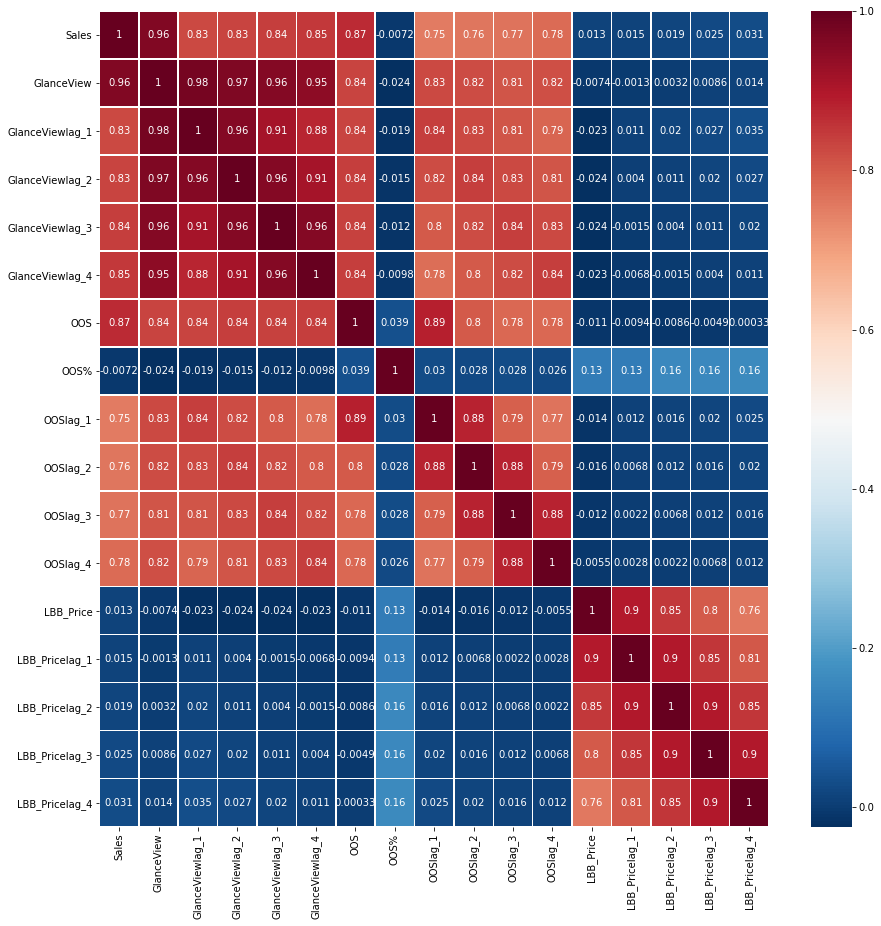

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

## For ILIActivity (Seasonal Flu)

# Conversion Percentage Data

In [91]:
# ConvPerc = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ConversionPercentageData.csv"))
# ConvPerc = ConvPerc.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Conversion% PW" : "ConvPerc"})
# ConvPerc.columns
ConvPerc = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","Conv_SubCategory.csv"))
ConvPerc = ConvPerc.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU","Conversion% PW" : "ConvPerc"})
ConvPerc.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'ConvPerc'], dtype='object')

In [92]:
Data1 = pd.merge(Data1, ConvPerc[['SKU','Time','ConvPerc']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date      Sales  GlanceView  \
0                   5 HTP  W40-19  2019-10-07     94.000         NaN   
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN   
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN   
3                    ACAI  W40-19  2019-10-07    264.000         NaN   
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN   
...                   ...     ...         ...        ...         ...   
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN   
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN   
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN   
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN   
14784                ZINC  W14-21  2021-04-05  25267.590         NaN   

       GlanceViewlag_1  GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
14780              0.0              0.0              0.0              0.0   
14781              0.0              0.0              0.0              0.0   
14782              0.0              0.0              0.0              0.0   
14783              0.0              0.0              0.0              0.0   
14784              0.0              0.0              0.0              0.0   

       OOS  ...  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
0      NaN  ...       0.0       0.0       0.0       0.0   0.224359   
1      NaN  ...       0.0       0.0       0.0       0.0   0.017544   
2      NaN  ...       0.0       0.0       0.0       0.0   0.038841   
3      NaN  ...       0.0       0.0       0.0       0.0   0.021055   
4      NaN  ...       0.0       0.0       0.0       0.0   0.110714   
...    ...  ...       ...       ...       ...       ...        ...   
14780  NaN  ...       0.0       0.0       0.0       0.0        NaN   
14781  NaN  ...       0.0       0.0       0.0       0.0        NaN   
14782  NaN  ...       0.0       0.0       0.0       0.0        NaN   
14783  NaN  ...       0.0       0.0       0.0       0.0        NaN   
14784  NaN  ...       0.0       0.0       0.0       0.0        NaN   

       LBB_Pricelag_1  LBB_Pricelag_2  LBB_Pricelag_3  LBB_Pricelag_4  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 0.0             0.0             0.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
14780             0.0             0.0             0.0             0.0   
14781             0.0             0.0             0.0             0.0   
14782             0.0             0.0             0.0             0.0   
14783             0.0             0.0             0.0             0.0   
14784             0.0             0.0             0.0             0.0   

       ConvPerc  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
14780       NaN  
14781       NaN  
14782       NaN  
14783       NaN  
14784       NaN  

[14785 rows x 21 columns]

In [93]:
pearson = Data1.corr(method='pearson')
pearson

Sales  GlanceView  GlanceViewlag_1  GlanceViewlag_2  \
Sales            1.000000    0.904814         0.771577         0.772546   
GlanceView       0.904814    1.000000         0.938402         0.913389   
GlanceViewlag_1  0.771577    0.938402         1.000000         0.922028   
GlanceViewlag_2  0.772546    0.913389         0.922028         1.000000   
GlanceViewlag_3  0.776770    0.900645         0.875331         0.922028   
GlanceViewlag_4  0.781302    0.886601         0.841945         0.875331   
OOS              0.555144    0.514523         0.529491         0.546146   
OOS%             0.032616    0.009868         0.020306         0.028295   
OOSlag_1         0.482191    0.507521         0.527974         0.531437   
OOSlag_2         0.487409    0.505148         0.514927         0.527974   
OOSlag_3         0.484778    0.494678         0.509184         0.514927   
OOSlag_4         0.492767    0.514123         0.493658         0.509184   
LBB_Price       -0.025985   -0.019262        -0.036966        -0.036134   
LBB_Pricelag_1  -0.025044   -0.017455        -0.019905        -0.022189   
LBB_Pricelag_2  -0.022057   -0.016003        -0.016212        -0.019905   
LBB_Pricelag_3  -0.018607   -0.015203        -0.012579        -0.016212   
LBB_Pricelag_4  -0.015676   -0.013447        -0.008848        -0.012579   
ConvPerc         0.010078    0.001165         0.001367         0.001706   

                 GlanceViewlag_3  GlanceViewlag_4       OOS      OOS%  \
Sales                   0.776770         0.781302  0.555144  0.032616   
GlanceView              0.900645         0.886601  0.514523  0.009868   
GlanceViewlag_1         0.875331         0.841945  0.529491  0.020306   
GlanceViewlag_2         0.922028         0.875331  0.546146  0.028295   
GlanceViewlag_3         1.000000         0.922028  0.531626  0.032696   
GlanceViewlag_4         0.922028         1.000000  0.531382  0.034770   
OOS                     0.531626         0.531382  1.000000  0.104298   
OOS%                    0.032696         0.034770  0.104298  1.000000   
OOSlag_1                0.533047         0.506491  0.682635  0.097685   
OOSlag_2                0.531437         0.533047  0.425358  0.076863   
OOSlag_3                0.527974         0.531437  0.401700  0.066233   
OOSlag_4                0.514927         0.527974  0.399549  0.063935   
LBB_Price              -0.035299        -0.034049 -0.016715 -0.004117   
LBB_Pricelag_1         -0.024147        -0.026033 -0.014375  0.004422   
LBB_Pricelag_2         -0.022189        -0.024147 -0.014460  0.019991   
LBB_Pricelag_3         -0.019905        -0.022189 -0.014748  0.021528   
LBB_Pricelag_4         -0.016212        -0.019905 -0.014383  0.026312   
ConvPerc                0.002096         0.003390  0.014491  0.073056   

                 OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
Sales            0.482191  0.487409  0.484778  0.492767  -0.025985   
GlanceView       0.507521  0.505148  0.494678  0.514123  -0.019262   
GlanceViewlag_1  0.527974  0.514927  0.509184  0.493658  -0.036966   
GlanceViewlag_2  0.531437  0.527974  0.514927  0.509184  -0.036134   
GlanceViewlag_3  0.533047  0.531437  0.527974  0.514927  -0.035299   
GlanceViewlag_4  0.506491  0.533047  0.531437  0.527974  -0.034049   
OOS              0.682635  0.425358  0.401700  0.399549  -0.016715   
OOS%             0.097685  0.076863  0.066233  0.063935  -0.004117   
OOSlag_1         1.000000  0.685016  0.431508  0.404337  -0.024294   
OOSlag_2         0.685016  1.000000  0.685016  0.431508  -0.023792   
OOSlag_3         0.431508  0.685016  1.000000  0.685016  -0.021846   
OOSlag_4         0.404337  0.431508  0.685016  1.000000  -0.018759   
LBB_Price       -0.024294 -0.023792 -0.021846 -0.018759   1.000000   
LBB_Pricelag_1  -0.013377 -0.014599 -0.015541 -0.015085   0.678956   
LBB_Pricelag_2  -0.011128 -0.013377 -0.014599 -0.015541   0.539584   
LBB_Pricelag_3  -0.009312 -0.011128 -0.013377 -0.014599   0.483190   
LBB_Pricelag_4  

<AxesSubplot:>

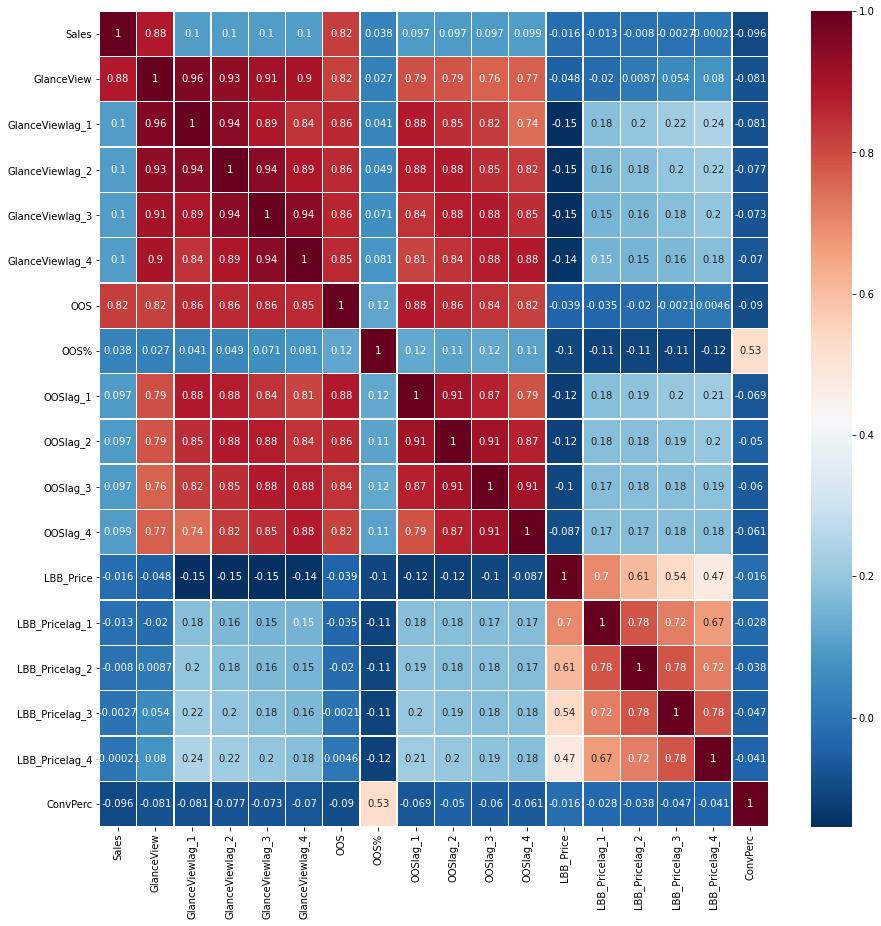

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# Channel Inventory

In [94]:
# ChInv = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ChInvData.csv"))
# ChInv = ChInv.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Ch INV PW" : "ChInv"})
# ChInv.columns
ChInv = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","SubCategory_ChInv.csv"))
ChInv = ChInv.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU","Ch INV PW" : "ChInv"})
ChInv.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'ChInv'], dtype='object')

In [95]:
Data1 = pd.merge(Data1, ChInv[['SKU','Time','ChInv']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date      Sales  GlanceView  \
0                   5 HTP  W40-19  2019-10-07     94.000         NaN   
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN   
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN   
3                    ACAI  W40-19  2019-10-07    264.000         NaN   
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN   
...                   ...     ...         ...        ...         ...   
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN   
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN   
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN   
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN   
14784                ZINC  W14-21  2021-04-05  25267.590         NaN   

       GlanceViewlag_1  GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
14780              0.0              0.0              0.0              0.0   
14781              0.0              0.0              0.0              0.0   
14782              0.0              0.0              0.0              0.0   
14783              0.0              0.0              0.0              0.0   
14784              0.0              0.0              0.0              0.0   

       OOS  ...  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  LBB_Pricelag_1  \
0      NaN  ...       0.0       0.0       0.0   0.224359             0.0   
1      NaN  ...       0.0       0.0       0.0   0.017544             0.0   
2      NaN  ...       0.0       0.0       0.0   0.038841             0.0   
3      NaN  ...       0.0       0.0       0.0   0.021055             0.0   
4      NaN  ...       0.0       0.0       0.0   0.110714             0.0   
...    ...  ...       ...       ...       ...        ...             ...   
14780  NaN  ...       0.0       0.0       0.0        NaN             0.0   
14781  NaN  ...       0.0       0.0       0.0        NaN             0.0   
14782  NaN  ...       0.0       0.0       0.0        NaN             0.0   
14783  NaN  ...       0.0       0.0       0.0        NaN             0.0   
14784  NaN  ...       0.0       0.0       0.0        NaN             0.0   

       LBB_Pricelag_2  LBB_Pricelag_3  LBB_Pricelag_4  ConvPerc    ChInv  
0                 0.0             0.0             0.0       NaN   2624.0  
1                 0.0             0.0             0.0       NaN    180.0  
2                 0.0             0.0             0.0       NaN  29248.0  
3                 0.0             0.0             0.0       NaN   1486.0  
4                 0.0             0.0             0.0       NaN   1818.0  
...               ...             ...             ...       ...      ...  
14780             0.0             0.0             0.0       NaN      NaN  
14781             0.0             0.0             0.0       NaN      NaN  
14782             0.0             0.0             0.0       NaN      NaN  
14783             0.0             0.0             0.0       NaN      NaN  
14784             0.0             0.0             0.0       NaN      NaN  

[14785 rows x 22 columns]

In [28]:
pearson = Data1.corr(method='pearson')
pearson

Sales  GlanceView  GlanceViewlag_1  GlanceViewlag_2  \
Sales            1.000000    0.884672         0.101119         0.100657   
GlanceView       0.884672    1.000000         0.957616         0.934402   
GlanceViewlag_1  0.101119    0.957616         1.000000         0.942033   
GlanceViewlag_2  0.100657    0.934402         0.942033         1.000000   
GlanceViewlag_3  0.101272    0.906056         0.889552         0.942033   
GlanceViewlag_4  0.101599    0.897484         0.840602         0.889552   
OOS              0.822144    0.817995         0.856855         0.855491   
OOS%             0.038359    0.027437         0.040757         0.049188   
OOSlag_1         0.096752    0.793986         0.880873         0.877689   
OOSlag_2         0.097291    0.785629         0.847209         0.880873   
OOSlag_3         0.097004    0.762801         0.824314         0.847209   
OOSlag_4         0.099212    0.768283         0.744373         0.824314   
LBB_Price       -0.016139   -0.047796        -0.153522        -0.154122   
LBB_Pricelag_1  -0.012530   -0.019960         0.175583         0.163633   
LBB_Pricelag_2  -0.008015    0.008682         0.195283         0.175583   
LBB_Pricelag_3  -0.002720    0.053605         0.215968         0.195283   
LBB_Pricelag_4  -0.000214    0.079576         0.243500         0.215968   
ConvPerc        -0.096318   -0.080588        -0.081089        -0.077432   
ChInv            0.837727    0.794465         0.786487         0.798894   

                 GlanceViewlag_3  GlanceViewlag_4       OOS      OOS%  \
Sales                   0.101272         0.101599  0.822144  0.038359   
GlanceView              0.906056         0.897484  0.817995  0.027437   
GlanceViewlag_1         0.889552         0.840602  0.856855  0.040757   
GlanceViewlag_2         0.942033         0.889552  0.855491  0.049188   
GlanceViewlag_3         1.000000         0.942033  0.862110  0.070687   
GlanceViewlag_4         0.942033         1.000000  0.851351  0.080823   
OOS                     0.862110         0.851351  1.000000  0.120309   
OOS%                    0.070687         0.080823  0.120309  1.000000   
OOSlag_1                0.841007         0.814362  0.884598  0.121296   
OOSlag_2                0.877689         0.841007  0.857354  0.114969   
OOSlag_3                0.880873         0.877689  0.838189  0.123869   
OOSlag_4                0.847209         0.880873  0.815770  0.108913   
LBB_Price              -0.150619        -0.141118 -0.039377 -0.102117   
LBB_Pricelag_1          0.154548         0.148631 -0.034969 -0.110182   
LBB_Pricelag_2          0.163633         0.154548 -0.020352 -0.105394   
LBB_Pricelag_3          0.175583         0.163633 -0.002053 -0.112360   
LBB_Pricelag_4          0.195283         0.175583  0.004560 -0.116027   
ConvPerc               -0.073278        -0.069801 -0.090132  0.529574   
ChInv                   0.809416         0.825080  0.868016  0.068296   

                 OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
Sales            0.096752  0.097291  0.097004  0.099212  -0.016139   
GlanceView       0.793986  0.785629  0.762801  0.768283  -0.047796   
GlanceViewlag_1  0.880873  0.847209  0.824314  0.744373  -0.153522   
GlanceViewlag_2  0.877689  0.880873  0.847209  0.824314  -0.154122   
GlanceViewlag_3  0.841007  0.877689  0.880873  0.847209  -0.150619   
GlanceViewlag_4  0.814362  0.841007  0.877689  0.880873  -0.141118   
OOS              0.884598  0.857354  0.838189  0.815770  -0.039377   
OOS%             0.121296  0.114969  0.123869  0.108913  -0.102117   
OOSlag_1         1.000000  0.906753  0.870984  0.788839  -0.122911   
OOSlag_2         0.906753  1.000000  0.906753  0.870984  -0.116005   
OOSlag_3         0.870984  0.906753  1.000000  0.906753  -0.102580   
OOSlag_4         0.788839  0.870984  0.906753  1.000000  -0.086562   
LBB_Price       -0.122911 -0.116005 -0.102580 -0.086562   1.000000   
LBB_Pricelag_1   0.177895  0.175376  0.172651  0.170703   0.699969   
LBB_Pric

<AxesSubplot:>

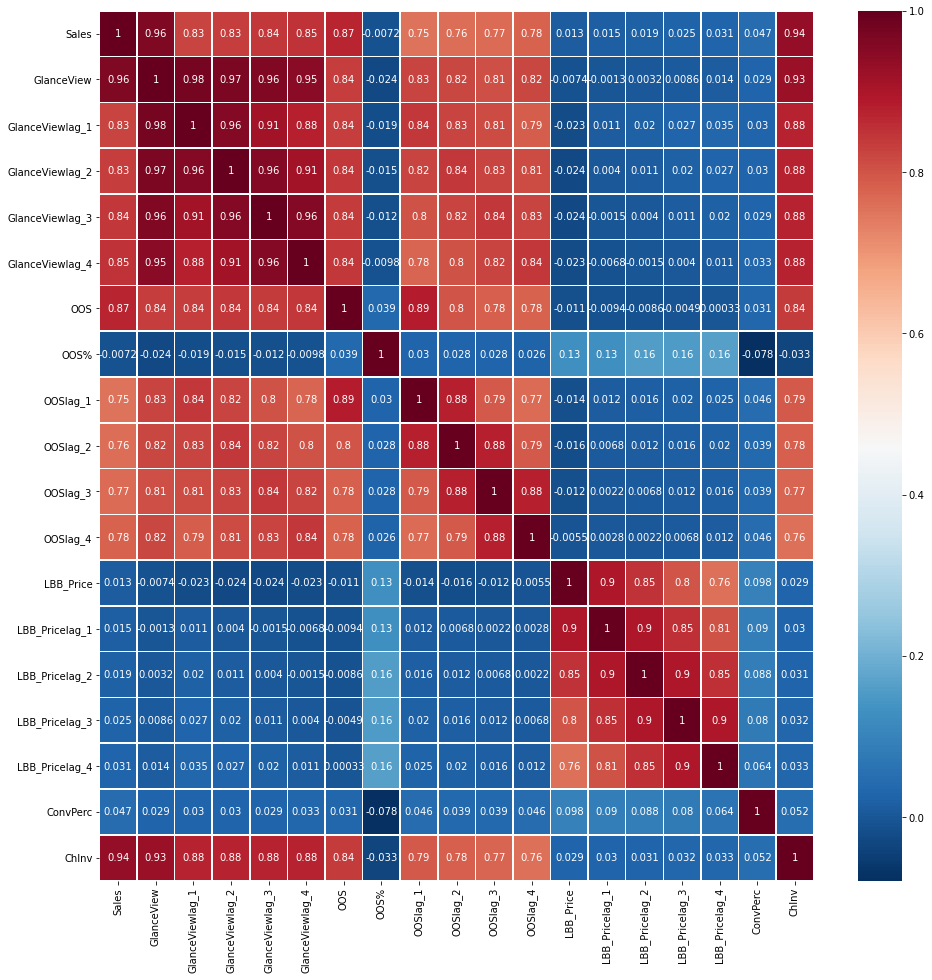

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [96]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="ChInv",month_ascending=True,lag_vars_range=[1,2,3,4])


In [97]:
Data1 = Data1.rename(columns={"lag_1": "ChInv_Lag1","lag_2" : "ChInv_Lag2", "lag_3" :"ChInv_Lag3","lag_4" :"ChInv_Lag4"})
Data1

SKU    Time        Date      Sales  GlanceView  \
0                   5 HTP  W40-19  2019-10-07     94.000         NaN   
1          A & D VITAMINS  W40-19  2019-10-07     29.000         NaN   
2      ABSORBABLE CALCIUM  W40-19  2019-10-07   1967.000         NaN   
3                    ACAI  W40-19  2019-10-07    264.000         NaN   
4        ACETYL CARNITINE  W40-19  2019-10-07    147.000         NaN   
...                   ...     ...         ...        ...         ...   
14780        WHEY PROTEIN  W14-21  2021-04-05      3.390         NaN   
14781    WOMEN'S MULTIPLE  W14-21  2021-04-05    390.714         NaN   
14782   WOMEN'S SPECIALTY  W14-21  2021-04-05    334.428         NaN   
14783             YOHIMBE  W14-21  2021-04-05    328.336         NaN   
14784                ZINC  W14-21  2021-04-05  25267.590         NaN   

       GlanceViewlag_1  GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
14780              0.0              0.0              0.0              0.0   
14781              0.0              0.0              0.0              0.0   
14782              0.0              0.0              0.0              0.0   
14783              0.0              0.0              0.0              0.0   
14784              0.0              0.0              0.0              0.0   

       OOS  ...  LBB_Pricelag_1  LBB_Pricelag_2  LBB_Pricelag_3  \
0      NaN  ...             0.0             0.0             0.0   
1      NaN  ...             0.0             0.0             0.0   
2      NaN  ...             0.0             0.0             0.0   
3      NaN  ...             0.0             0.0             0.0   
4      NaN  ...             0.0             0.0             0.0   
...    ...  ...             ...             ...             ...   
14780  NaN  ...             0.0             0.0             0.0   
14781  NaN  ...             0.0             0.0             0.0   
14782  NaN  ...             0.0             0.0             0.0   
14783  NaN  ...             0.0             0.0             0.0   
14784  NaN  ...             0.0             0.0             0.0   

       LBB_Pricelag_4  ConvPerc    ChInv  ChInvlag_1  ChInvlag_2  ChInvlag_3  \
0                 0.0       NaN   2624.0         0.0         0.0         0.0   
1                 0.0       NaN    180.0         0.0         0.0         0.0   
2                 0.0       NaN  29248.0         0.0         0.0         0.0   
3                 0.0       NaN   1486.0         0.0         0.0         0.0   
4                 0.0       NaN   1818.0         0.0         0.0         0.0   
...               ...       ...      ...         ...         ...         ...   
14780             0.0       NaN      NaN         0.0         0.0         0.0   
14781             0.0       NaN      NaN         0.0         0.0         0.0   
14782             0.0       NaN      NaN         0.0         0.0         0.0   
14783             0.0       NaN      NaN         0.0         0.0         0.0   
14784             0.0       NaN      NaN         0.0         0.0         0.0   

       ChInvlag_4  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
14780         0.0  
14781         0.0  
14782         0.0  
14783         0.0  
14784         0.0  

[14785 rows x 26 columns]

In [31]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

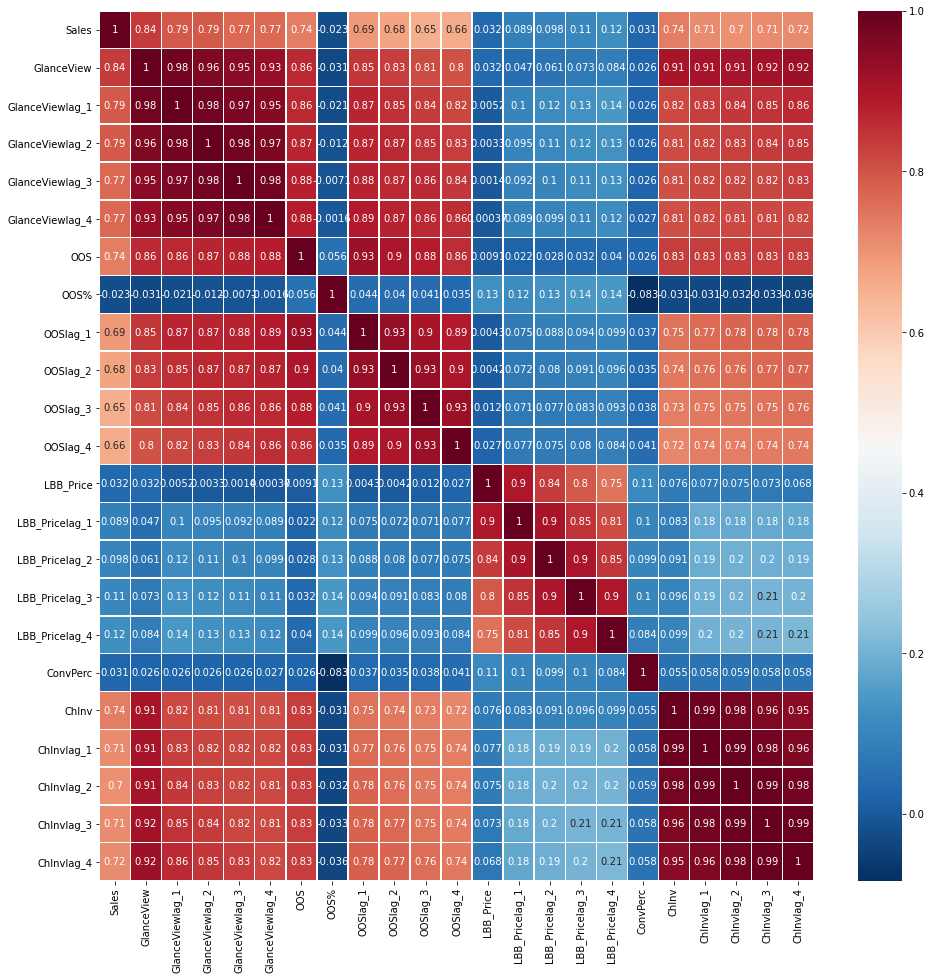

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# SubCategory Sales Rank, Shipped COGS, Units Data

In [98]:
# AmzData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","COGS_Sales_Rank_Data.csv"))
# AmzData = AmzData.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU"})
# AmzData.columns
AmzData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","SC_Cogs.csv"))
AmzData = AmzData.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU"})
AmzData.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'Shipped COGS',
       'Shipped Units', 'Subcategory (Sales Rank)'],
      dtype='object')

In [99]:
Data1 = pd.merge(Data1, AmzData[['SKU','Time','Shipped COGS','Shipped Units','Subcategory (Sales Rank)']], how='left', on=['SKU','Time'])


In [34]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

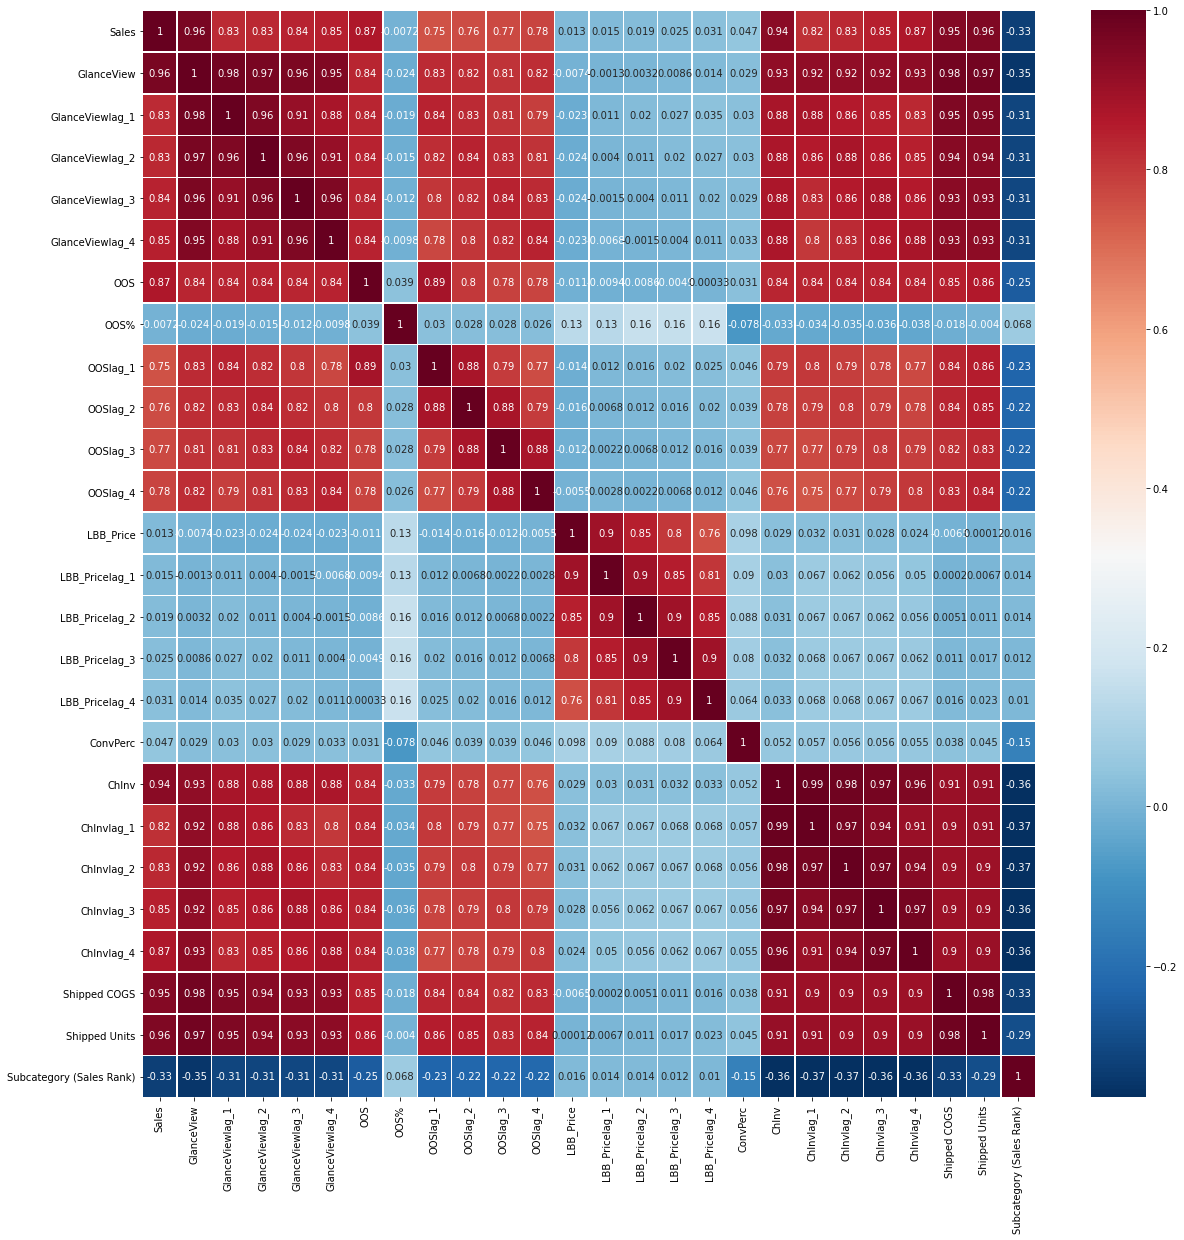

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# Amazon Data

In [100]:
# AmazonData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","AmazonData.csv"))
# AmazonData = AmazonData.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU"})
# AmazonData.columns
AmazonData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","SC_Amz.csv"))
AmazonData = AmazonData.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU"})
del AmazonData['Version.[Version Name]']
AmazonData.columns


Index(['Time', 'SKU', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV'],
      dtype='object')

In [101]:
#AmazonData.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,AmazonData , how='left', on=['SKU','Time'])
#Data1['Version.Version Name']
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV'],
      dtype='object')

In [102]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

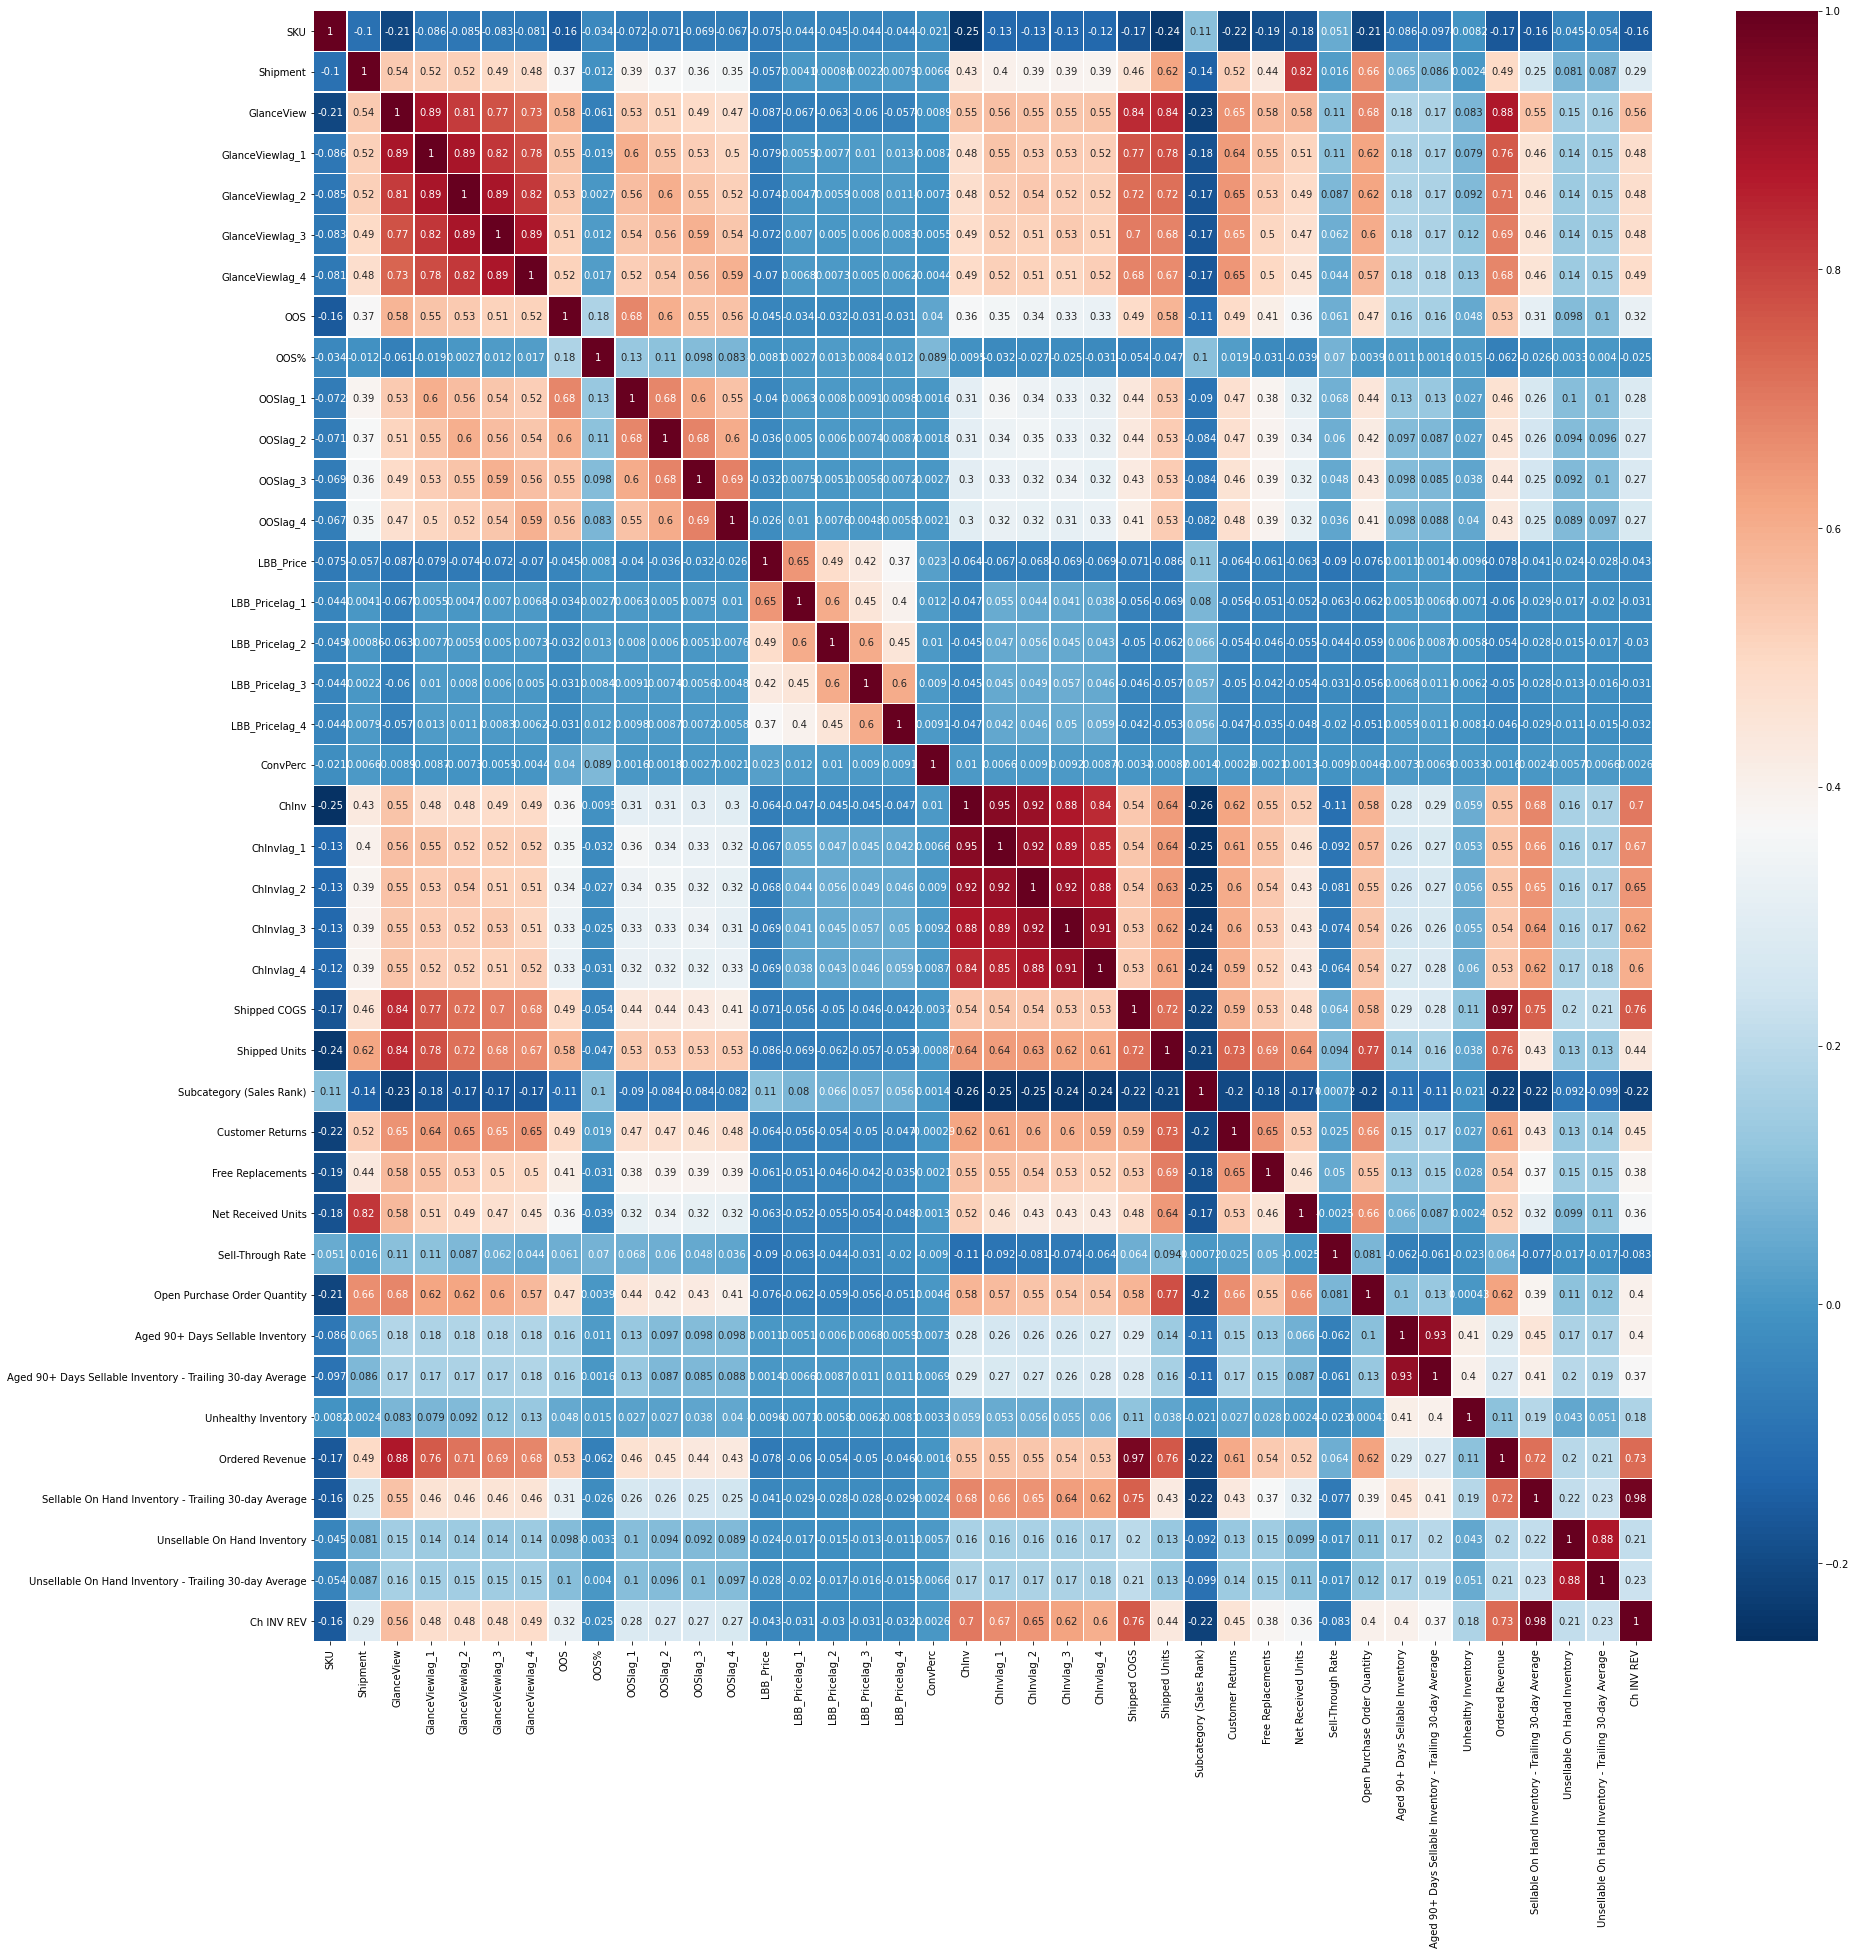

In [365]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [211]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [157]:
pearson.to_csv("Shipment_Correlation_Analysis_Brand.csv")

In [158]:
pearson

SKU  Shipment  \
SKU                                                 1.000000 -0.102507   
Shipment                                           -0.102507  1.000000   
GlanceView                                         -0.205146  0.536524   
GlanceView_Lag1                                    -0.086087  0.519774   
GlanceView_Lag2                                    -0.084614  0.521981   
GlanceView_Lag3                                    -0.082839  0.494118   
GlanceView_Lag4                                    -0.081321  0.482801   
OOS                                                -0.161294  0.374227   
OOS%                                               -0.034290 -0.012284   
OOS_Lag1                                           -0.071586  0.387963   
OOS_Lag2                                           -0.071088  0.368675   
OOS_Lag3                                           -0.068924  0.359409   
OOS_Lag4                                           -0.067188  0.354162   
LBB_Price                                          -0.075380 -0.057241   
LBBP_Lag1                                          -0.044271  0.004113   
LBBP_Lag2                                          -0.044503  0.000865   
LBBP_Lag3                                          -0.044179  0.002187   
LBBP_Lag4                                          -0.044311  0.007929   
ConvPerc                                           -0.021093  0.006610   
ChInv                                              -0.254100  0.429968   
ChInv_Lag1                                         -0.127511  0.403861   
ChInv_Lag2                                         -0.126346  0.387262   
ChInv_Lag3                                         -0.125083  0.390235   
ChInv_Lag4                                         -0.123826  0.388922   
Shipped COGS                                       -0.172293  0.457194   
Shipped Units                                      -0.236184  0.617199   
Subcategory (Sales Rank)                            0.106516 -0.143544   
Customer Returns                                   -0.220087  0.524171   
Free Replacements                                  -0.189419  0.436187   
Net Received Units                                 -0.181770  0.820019   
Sell-Through Rate                                   0.051189  0.016247   
Open Purchase Order Quantity                       -0.209670  0.662819   
Aged 90+ Days Sellable Inventory                   -0.086474  0.064885   
Aged 90+ Days Sellable Inventory - Trailing 30-... -0.097165  0.086297   
Unhealthy Inventory                                -0.008170  0.002395   
Ordered Revenue                                    -0.166508  0.494327   
Sellable On Hand Inventory - Trailing 30-day Av... -0.161952  0.250324   
Unsellable On Hand Inventory                       -0.044779  0.081231   
Unsellable On Hand Inventory - Trailing 30-day ... -0.053607  0.087238   
Ch INV REV                                         -0.161729  0.292340   

                                                    GlanceView  \
SKU                                                  -0.205146   
Shipment                                              0.536524   
GlanceView                                            1.000000   
GlanceView_Lag1                                       0.886950   
GlanceView_Lag2                                       0.812583   
GlanceView_Lag3                                       0.771224   
GlanceView_Lag4                                       0.734157   
OOS                                                   0.581460   
OOS%                                                 -0.061084   
OOS_Lag1                                              0.533828   
OOS_Lag2                                              0.509377   
OOS_Lag3                                              0.488769   
OOS_Lag4                                              0.470423   
LBB_Price                                            -0.087486   
LBBP_Lag1                       

# Customer Promo

In [103]:
# CustomerPromo = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","CustomerPromo.csv"))
# CustomerPromo = CustomerPromo.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Price Discount% Day":"CustomerPromo"})
# CustomerPromo.columns
CustomerPromo = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","Sc_Promo.csv"))
CustomerPromo = CustomerPromo.rename(columns={"Time.[Week]": "Time", "Item.[A3]":"SKU","Price Discount% Day":"CustomerPromo"})
del CustomerPromo['Version.[Version Name]']
CustomerPromo.columns

Index(['Promotion.[Promotion ID]', 'Time', 'SKU', 'CustomerPromo'], dtype='object')

In [104]:
#CustomerPromo.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,CustomerPromo , how='left', on=['SKU','Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo'],
      dtype='object')

In [39]:
pearson = Data1.corr(method='pearson')


In [162]:
pearson.to_csv("Shipment_Correlation_Analysis_CustomerPromo.csv")

<AxesSubplot:>

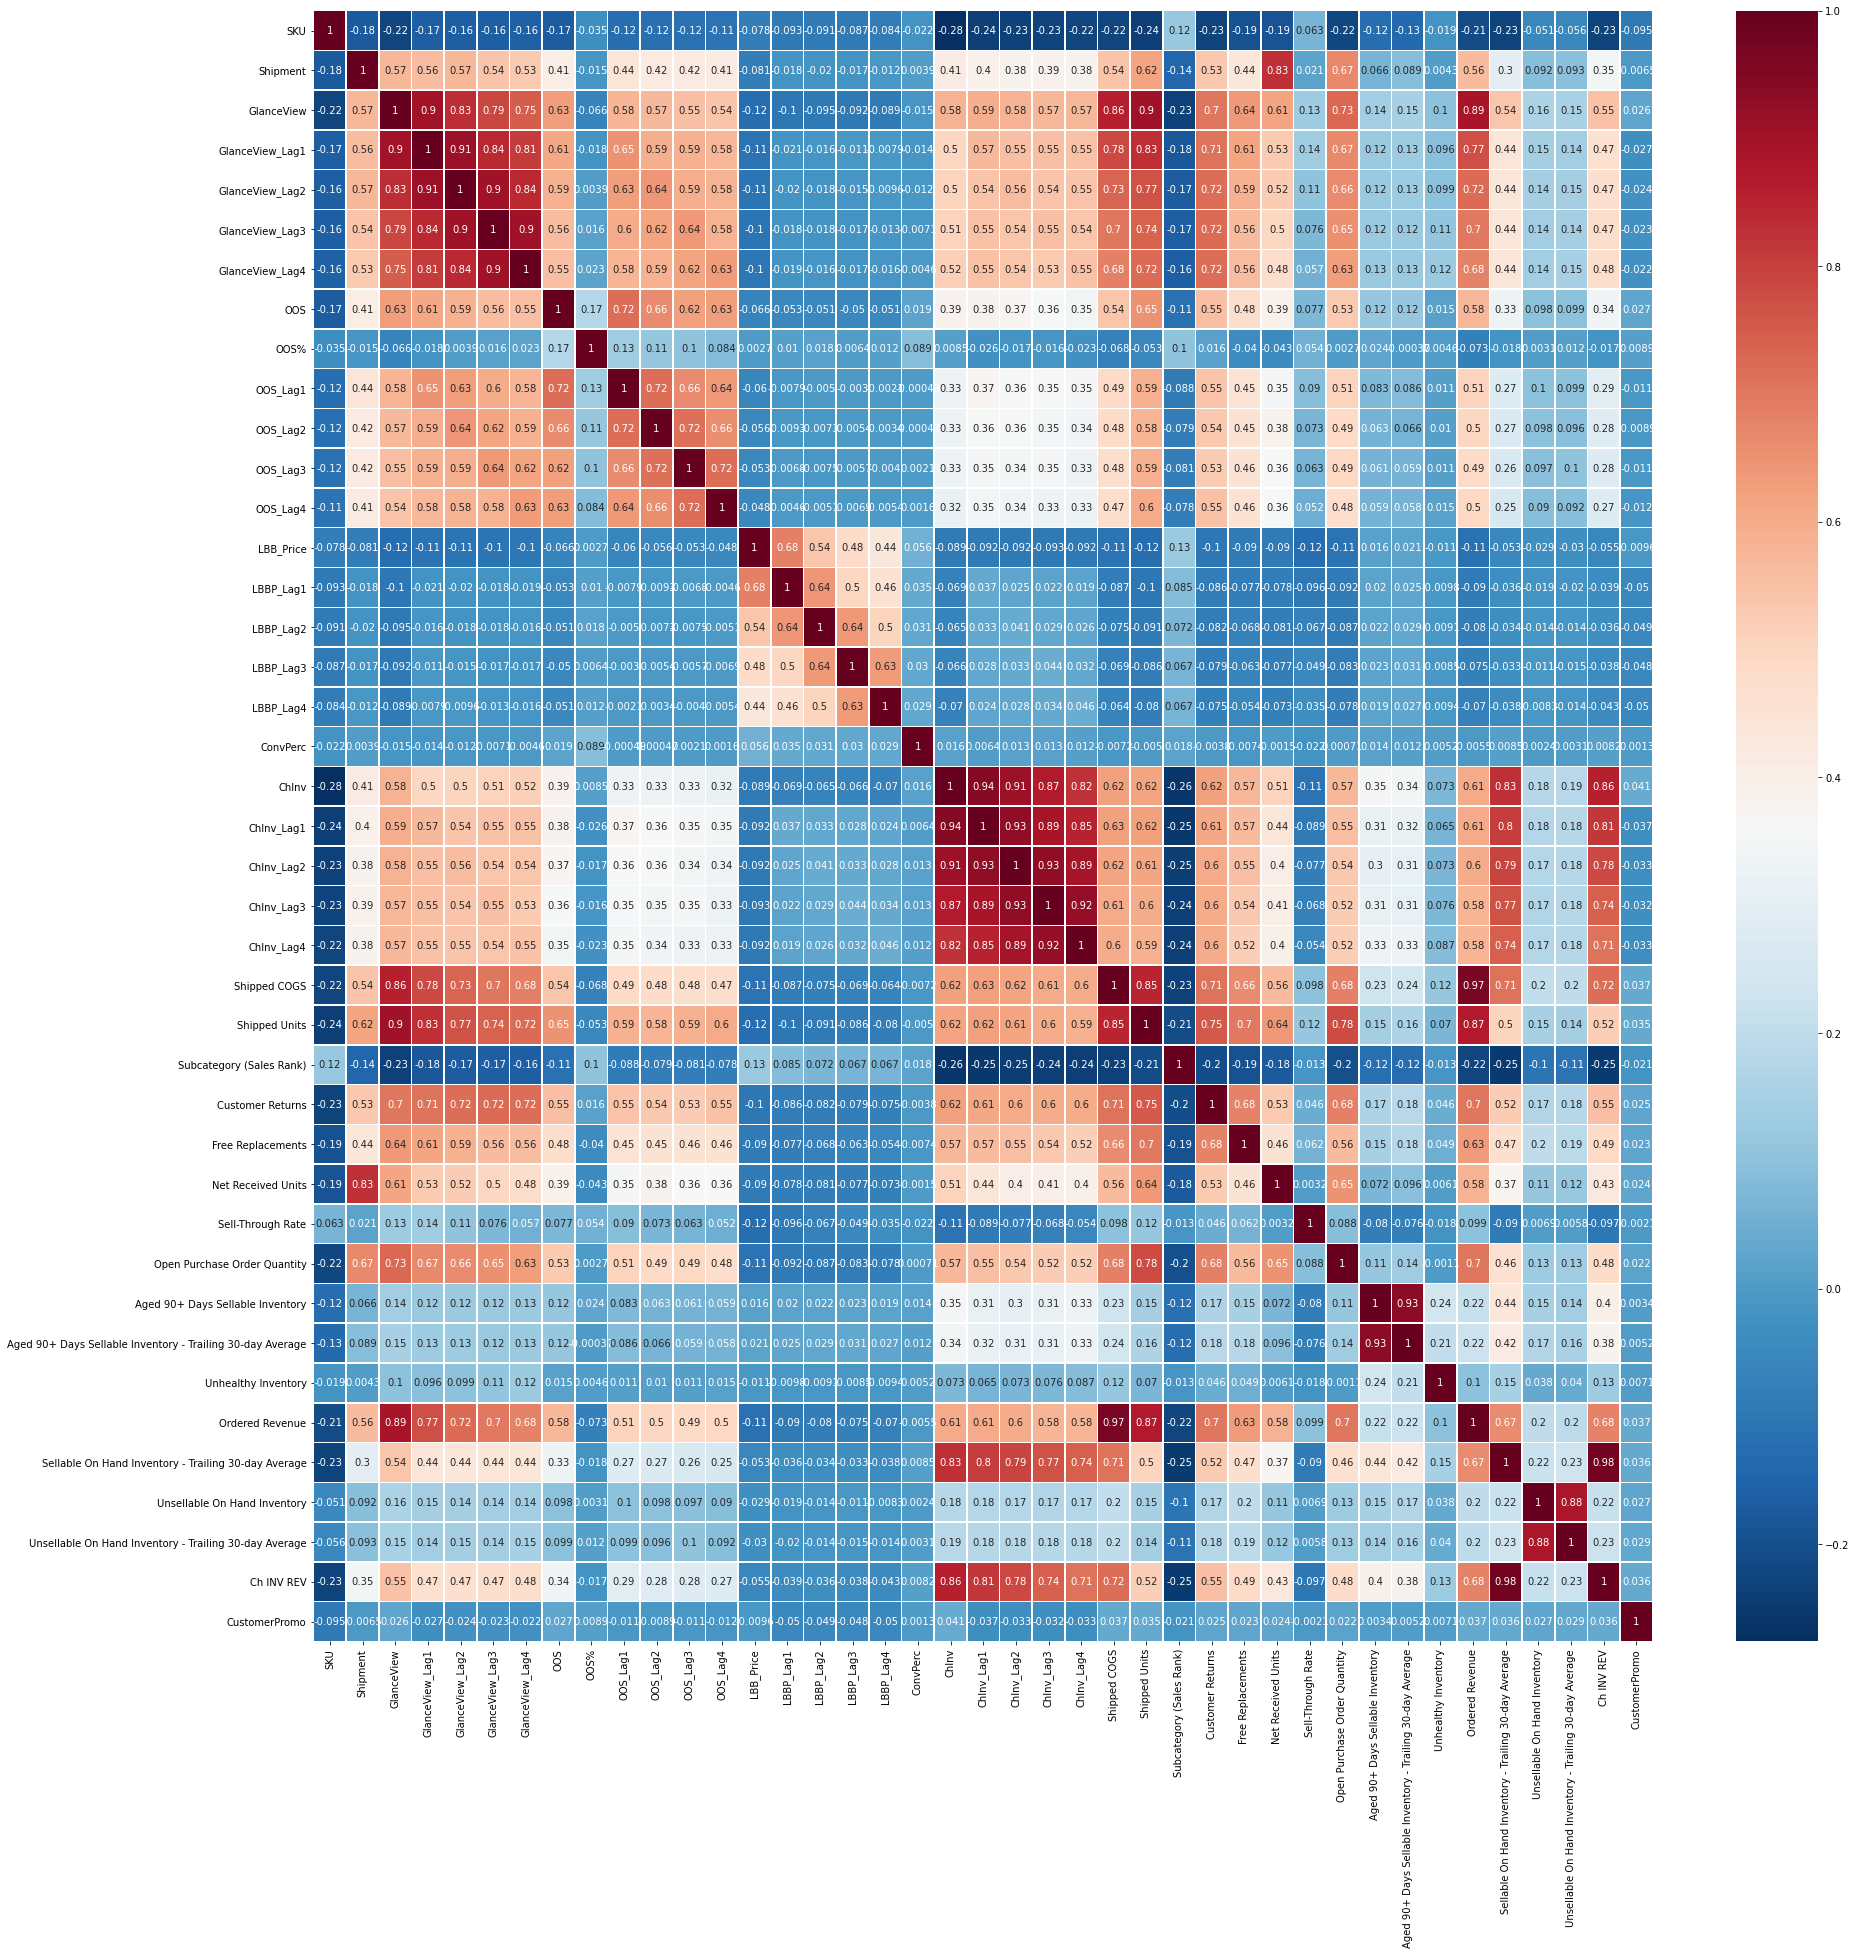

In [163]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# ILI Activity Level

In [105]:
ILIData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ILIActivityData.csv"))
ILIData = ILIData.rename(columns={"Time.[Week]": "Time","ILI Activity Level PW":"ILIActivity"})
del ILIData['Version.[Version Name]']
ILIData.columns

Index(['Time', 'ILIActivity'], dtype='object')

In [106]:
#ILIData.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,ILIData , how='left', on=['Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity'],
      dtyp

In [40]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

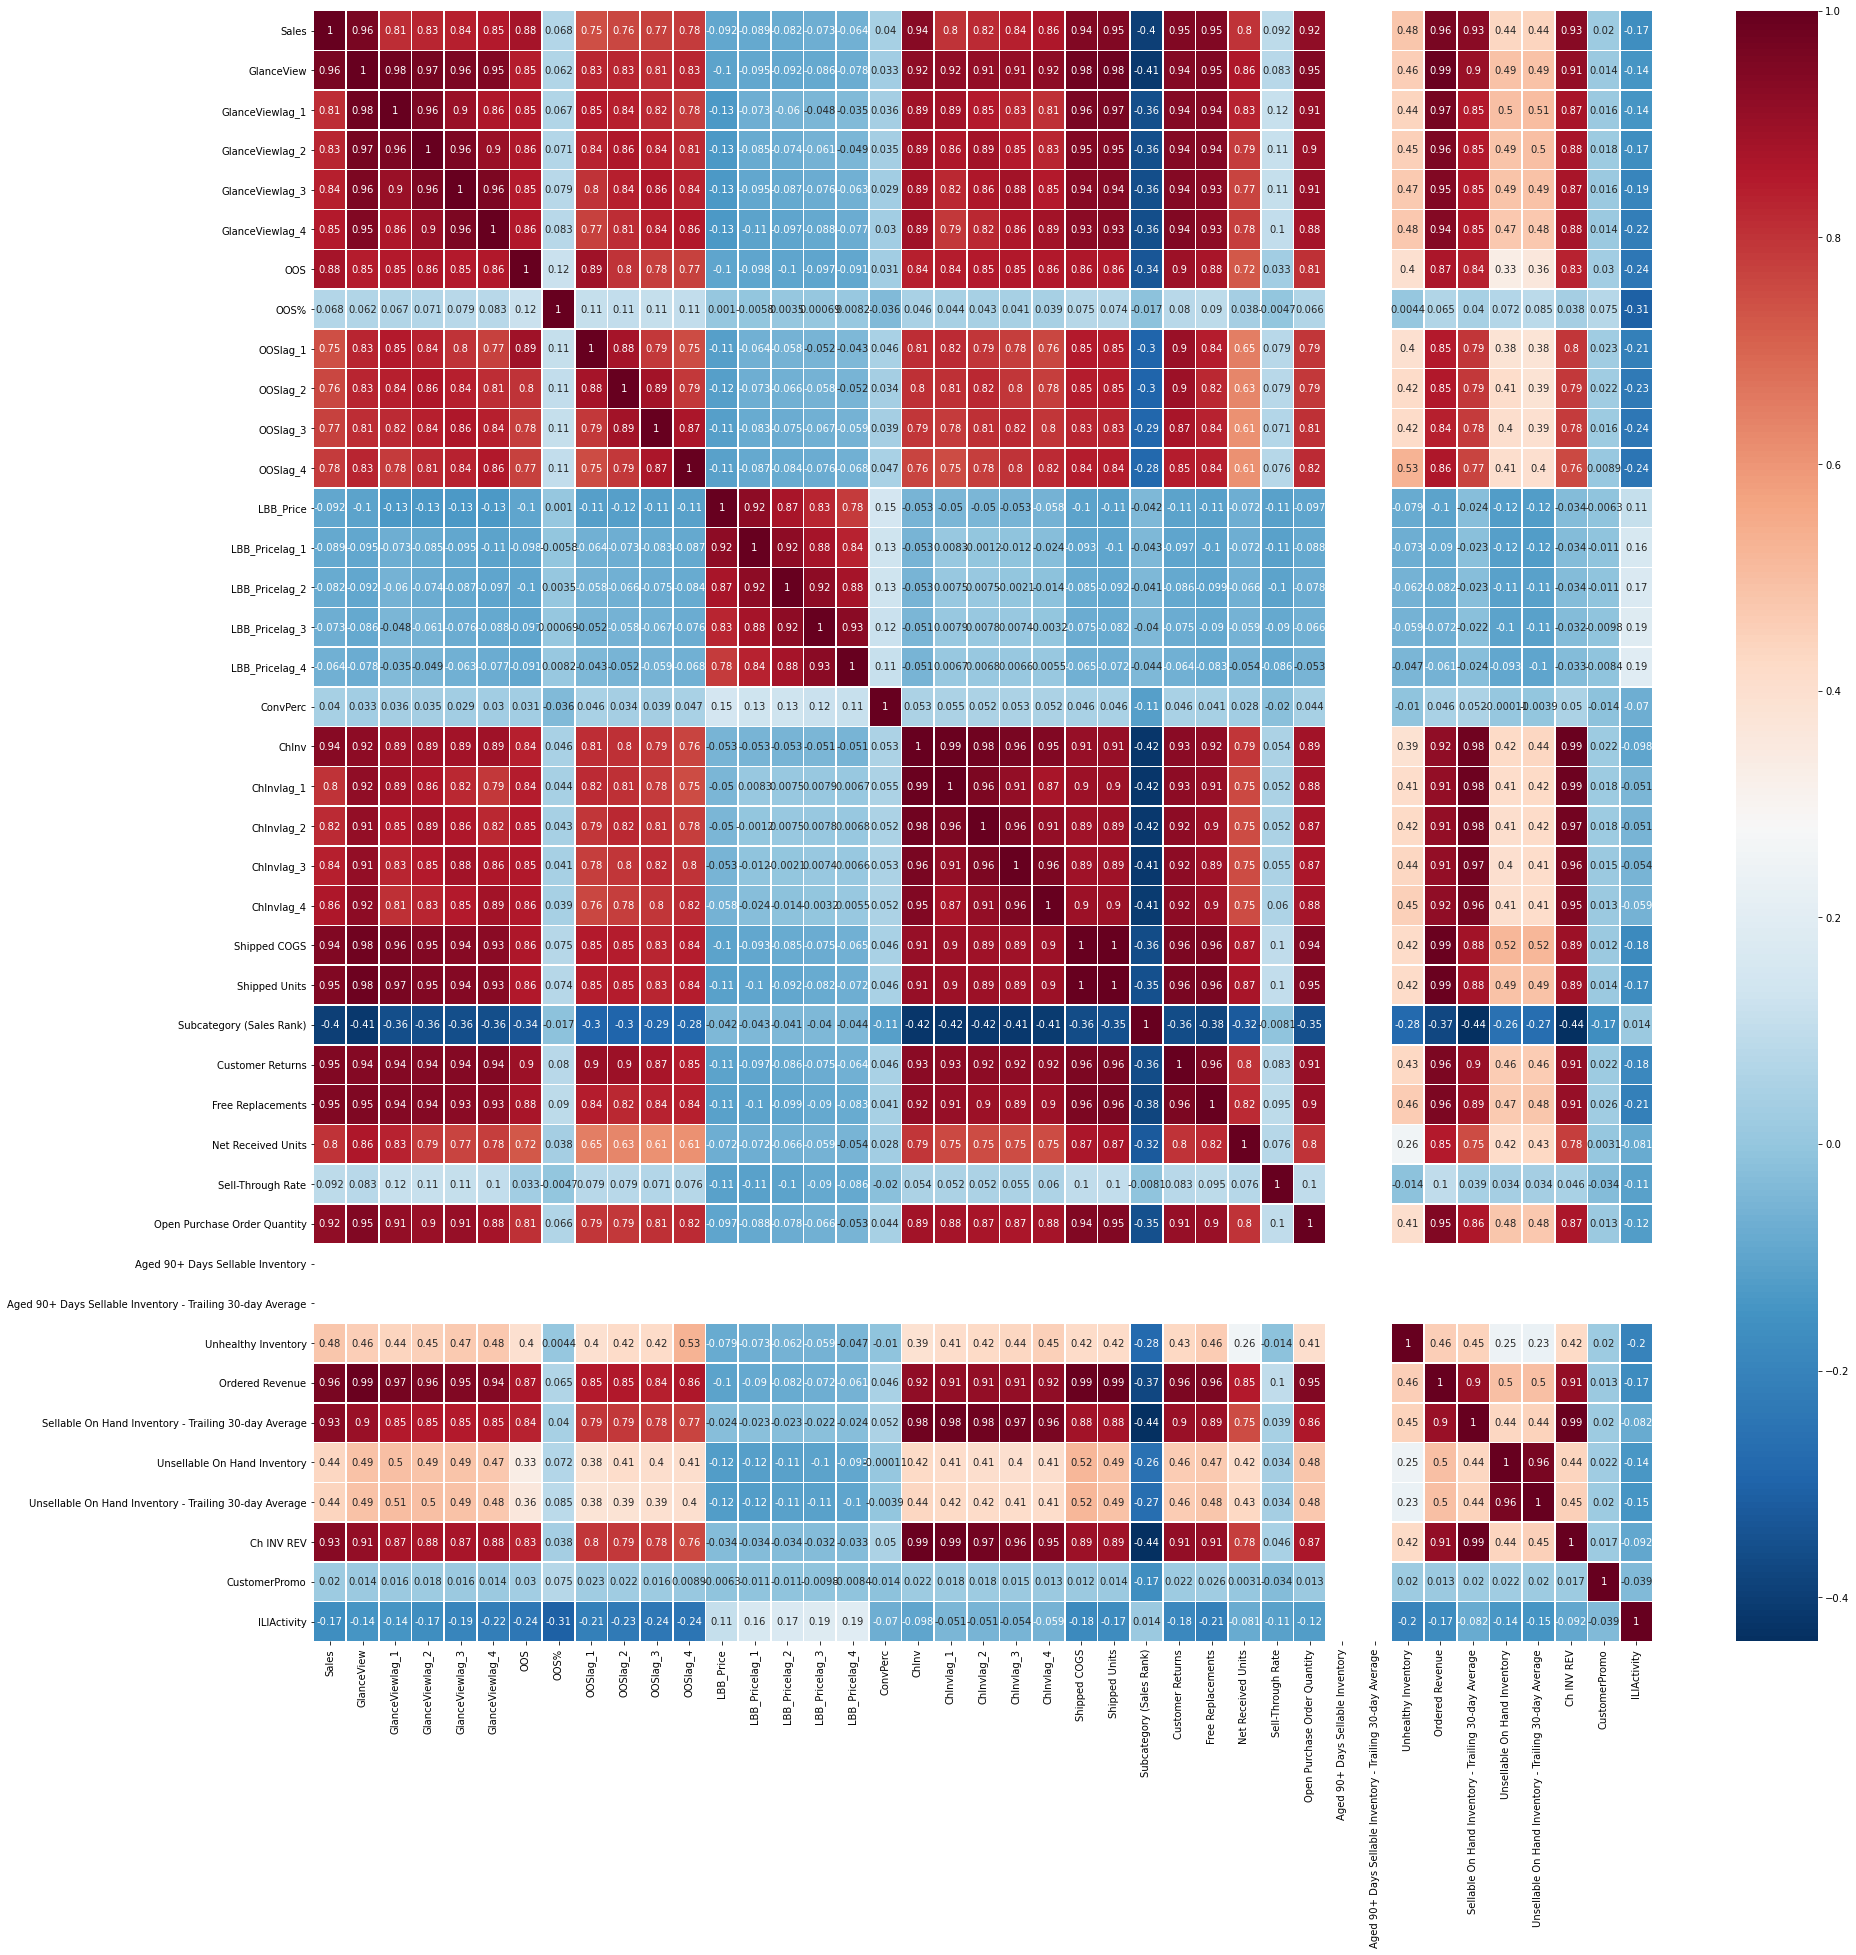

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [168]:
pearson.to_csv("Shipment_Correlation_Analysis_CustomerPromo_with_ILI_Activity.csv")

In [107]:
uniq_combs = Data1.SKU.unique()
uniq_combs

array(['5 HTP', 'A & D VITAMINS', 'ABSORBABLE CALCIUM', 'ACAI',
       'ACETYL CARNITINE', 'ADULT MULTIPLE', 'ALOE VERA', 'ALPHA LIPOIC',
       'AMINO ACID', 'AMINO SPECIALTY', 'ANTIOXIDANT SPECIALTY',
       'APPLE CIDER VINEGAR', 'ARGININE', 'ASHWAGANDA', 'ASTAXANTHIN',
       'B-12', 'B-2', 'B-6', 'B-COMPLEX', 'B SPECIALTY', 'BCAA',
       'BEAUTY SUPPLEMENTS', 'BEET ROOT', 'BETA CAROTENE', 'BILBERRY',
       'BIOTIN', 'BLACK COHOSH', 'BORAGE OIL', 'BROMELAIN',
       'BUTCHERS BROOM', 'C-1000', 'C-500', 'C-VIT WITH ROSE HIPS',
       'C SPECIALTY', 'CALCIUM', 'CALCIUM SPECIALTY',
       'CALCIUM/MAGNESIUM/ZINC', 'CARNITINE', 'CHARCOAL', 'CHERRY',
       "CHILDREN'S CALCIUM", "CHILDREN'S DIGESTIVE SUPPORT",
       'CHILDRENS MULTIPLE', 'CHROMIUM', 'CINNAMON', 'CLA',
       'COCONUT SUPPLEMENT', 'COD LIVER OIL', 'COENZYME Q10',
       'COENZYME Q10 SPECIALTY', 'COLLAGEN', 'CRANBERRY', 'CREATINE',
       'D SPECIALTY', 'D VITAMINS', 'DHEA', 'DIET SPECIALTY', 'DIFFUSERS',
       'DIGE

In [108]:
#pearson.iloc[0]
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity'],
      dtyp

In [109]:
from tqdm import tqdm_notebook as tqdm

forecast_length = 1

In [44]:
#Data1=Data1.dropna()
Data1.to_csv("Data1111.csv")
temp = Data1[(Data1.SKU==100180442)]
pear = temp.corr(method='pearson')
pear.iloc[1]
pear['Sku'] = 'fgfdg'
pear

Sales  GlanceView  \
Sales                                                 NaN         NaN   
GlanceView                                            NaN         NaN   
GlanceViewlag_1                                       NaN         NaN   
GlanceViewlag_2                                       NaN         NaN   
GlanceViewlag_3                                       NaN         NaN   
GlanceViewlag_4                                       NaN         NaN   
OOS                                                   NaN         NaN   
OOS%                                                  NaN         NaN   
OOSlag_1                                              NaN         NaN   
OOSlag_2                                              NaN         NaN   
OOSlag_3                                              NaN         NaN   
OOSlag_4                                              NaN         NaN   
LBB_Price                                             NaN         NaN   
LBB_Pricelag_1                                        NaN         NaN   
LBB_Pricelag_2                                        NaN         NaN   
LBB_Pricelag_3                                        NaN         NaN   
LBB_Pricelag_4                                        NaN         NaN   
ConvPerc                                              NaN         NaN   
ChInv                                                 NaN         NaN   
ChInvlag_1                                            NaN         NaN   
ChInvlag_2                                            NaN         NaN   
ChInvlag_3                                            NaN         NaN   
ChInvlag_4                                            NaN         NaN   
Shipped COGS                                          NaN         NaN   
Shipped Units                                         NaN         NaN   
Subcategory (Sales Rank)                              NaN         NaN   
Customer Returns                                      NaN         NaN   
Free Replacements                                     NaN         NaN   
Net Received Units                                    NaN         NaN   
Sell-Through Rate                                     NaN         NaN   
Open Purchase Order Quantity                          NaN         NaN   
Aged 90+ Days Sellable Inventory                      NaN         NaN   
Aged 90+ Days Sellable Inventory - Trailing 30-...    NaN         NaN   
Unhealthy Inventory                                   NaN         NaN   
Ordered Revenue                                       NaN         NaN   
Sellable On Hand Inventory - Trailing 30-day Av...    NaN         NaN   
Unsellable On Hand Inventory                          NaN         NaN   
Unsellable On Hand Inventory - Trailing 30-day ...    NaN         NaN   
Ch INV REV                                            NaN         NaN   
ILIActivity                                           NaN         NaN   

                                                    GlanceViewlag_1  \
Sales                                                           NaN   
GlanceView                                                      NaN   
GlanceViewlag_1                                                 NaN   
GlanceViewlag_2                                                 NaN   
GlanceViewlag_3                                                 NaN   
GlanceViewlag_4                                                 NaN   
OOS                                                             NaN   
OOS%                                                            NaN   
OOSlag_1                                                        NaN   
OOSlag_2                                                        NaN   
OOSlag_3                                                        NaN   
OOSlag_4                                                        NaN   
LBB_Price                                                       NaN   
LBB_Pricelag_1                                                  

# Lag Creation for all Measures

In [110]:
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity'],
      dtyp

In [111]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Shipped Units",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Shipped Units_Lag1","lag_2" : "Shipped Units_Lag2", "lag_3" :"Shipped Units_Lag3","lag_4" :"Shipped Units_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [112]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Shipped COGS",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Shipped COGS_Lag1","lag_2" : "Shipped COGS_Lag2", "lag_3" :"Shipped COGS_Lag3","lag_4" :"Shipped COGS_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [113]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Subcategory (Sales Rank)",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Subcategory (Sales Rank)_Lag1","lag_2" : "Subcategory (Sales Rank)_Lag2", "lag_3" :"Subcategory (Sales Rank)_Lag3","lag_4" :"Subcategory (Sales Rank)_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [114]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Customer Returns",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Customer Returns_Lag1","lag_2" : "Customer Returns_Lag2", "lag_3" :"Customer Returns_Lag3","lag_4" :"Customer Returns_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [115]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Free Replacements",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Free Replacements_Lag1","lag_2" : "Free Replacements_Lag2", "lag_3" :"Free Replacements_Lag3","lag_4" :"Free Replacements_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [116]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Net Received Units",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Net Received Units_Lag1","lag_2" : "Net Received Units_Lag2", "lag_3" :"Net Received Units_Lag3","lag_4" :"Net Received Units_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [117]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Sell-Through Rate",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns


Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [118]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Open Purchase Order Quantity",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [119]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Aged 90+ Days Sellable Inventory",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [120]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Aged 90+ Days Sellable Inventory - Trailing 30-day Average",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [121]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Unhealthy Inventory",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [122]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Ordered Revenue",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [123]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Sellable On Hand Inventory - Trailing 30-day Average",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Customer Returns', 'Free Replacements',
       'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'CustomerPromo', 'ILIActivity',
       'Shi

In [124]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Unsellable On Hand Inventory - Trailing 30-day Average",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS',
       ...
       'Ordered Revenuelag_3', 'Ordered Revenuelag_4',
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_1',
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_2',
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_4',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_1',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_2',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_4'],
      dtype='object', length=101)

In [125]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Ch INV REV",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS',
       ...
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_4',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_1',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_2',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_4',
       'Ch INV REVlag_1', 'Ch INV REVlag_2', 'Ch INV REVlag_3',
       'Ch INV REVlag_4'],
      dtype='object', length=105)

In [126]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="CustomerPromo",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS',
       ...
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_4',
       'Ch INV REVlag_1', 'Ch INV REVlag_2', 'Ch INV REVlag_3',
       'Ch INV REVlag_4', 'CustomerPromolag_1', 'CustomerPromolag_2',
       'CustomerPromolag_3', 'CustomerPromolag_4'],
      dtype='object', length=109)

In [62]:
Data1.to_csv("Data1_Lag_Columns_v1_Brand.csv")

In [392]:
pear['GlanceView_Lag4']['GlanceView_Lag4']

1.0

In [520]:
del Data1['Promotion.[Promotion ID]_y']

In [62]:
uniq_combs = Data1.SKU.unique()
uniq_combs
names1 = Data1.columns
names1 = np.array(subset_df.columns)
names1

NameError: name 'subset_df' is not defined

In [127]:
names = Data1.columns
names = np.array(subset_df.columns)
names = names.tolist()
#del names[0]
names.remove("Time")
names.remove("Date")
names.remove("SKU")
names.remove("Version.[Version Name]_x")
names.remove("Version.[Version Name]_y")
names.remove("Promotion.[Promotion ID]")
names.remove("Version.[Version Name]")
#names.remove("C")
#names = np.array(names)
names

ValueError: list.remove(x): x not in list

In [128]:
import numpy as np

In [129]:
result_list1 = []
for SKU in tqdm(uniq_combs):
    df = pd.DataFrame()
    df["SKU"] = [SKU for _ in range(forecast_length)]
    #df["ts_id"] = "1621312_7UP_Belgium"
    #print(df)
    # SARIMA
    subset_df = Data1[(Data1.SKU == SKU)]
    #subset_df = subset_df.fillna(0)
    subset_df['SKU'] = SKU
    #print(subset_df)
    pearson_df = subset_df.corr(method='pearson')
    df['Item'] = SKU   
    #df['']
    names = Data1.columns
    names = np.array(subset_df.columns)
    names = names.tolist()
    #del names[0]
    names.remove("Time")
    names.remove("Date")
    names.remove("SKU")
#     names.remove("Version.[Version Name]_x")
#     names.remove("Version.[Version Name]_y")
    names.remove("Promotion.[Promotion ID]")
#     names.remove("Promotion.[Promotion ID]_x")
    #names.remove("Version.[Version Name]")
    #names.remove("C")
    #names = np.array(names)
    names
    for names in tqdm(names):
        print(names)
        if(names!="C"):
            df[names] = pearson_df['Sales'][names]

    #print(pearson_df)
    #print("Corelation", pearson_df.iloc[1])
    #df["corr"] = pearson_df.iloc[2]
  
    
  
    result_list1.append(df)

<ipython-input-129-9ff4b8c425dc>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for SKU in tqdm(uniq_combs):


  0%|          | 0/192 [00:00<?, ?it/s]

<ipython-input-129-9ff4b8c425dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['SKU'] = SKU
<ipython-input-129-9ff4b8c425dc>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for names in tqdm(names):


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


  0%|          | 0/105 [00:00<?, ?it/s]

Sales
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag_1


In [ ]:
df.drop_duplicates(subset=['brand'])

In [130]:
prediction_df1 = pd.concat(result_list1, sort=False)
#prediction_df1 = prediction_df1 = np.where(prediction_df1['SARIMAX_Predictions'] < 0, 0,prediction_df1['SARIMAX_Predictions'])
pred_path = os.path.join("NBTY_predictions",'prophet')
if not os.path.exists(pred_path):
    os.makedirs(pred_path)

prediction_df1.to_csv(os.path.join(pred_path,'Sellout_Corr_SubCategory_Wise_3003.csv'))
pred_path

'NBTY_predictions\\prophet'

In [314]:
result_list1

[         SKU       Item
 0  100003796  100003796,
          SKU       Item
 0  100003798  100003798,
          SKU       Item
 0  100003808  100003808,
          SKU       Item
 0  100003809  100003809,
          SKU       Item
 0  100003811  100003811,
          SKU       Item
 0  100003816  100003816,
          SKU       Item
 0  100003822  100003822,
          SKU       Item
 0  100003831  100003831,
          SKU       Item
 0  100003839  100003839,
          SKU       Item
 0  100003849  100003849,
          SKU       Item
 0  100003852  100003852,
          SKU       Item
 0  100003854  100003854,
          SKU       Item
 0  100003861  100003861,
          SKU       Item
 0  100003862  100003862,
          SKU       Item
 0  100003864  100003864,
          SKU       Item
 0  100003866  100003866,
          SKU       Item
 0  100003884  100003884,
          SKU       Item
 0  100003885  100003885,
          SKU       Item
 0  100003892  100003892,
          SKU       Item
 0  10